# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [10]:
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
sns.set_style("whitegrid")
import calendar

df = pd.read_csv('data/human_body_temperature.csv')


With .25 p-value, we fail to reject the null hypothesis that the distribution comes from a normal distribution:

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Standard error of measurement:  0.0643044168379

Standard Deviation:  0.730357778905

DescribeResult(nobs=130, minmax=(96.299999999999997, 100.8), mean=98.249230769230749, variance=0.53755754323196159, skewness=-0.004367976879081625, kurtosis=0.7049597854114693)


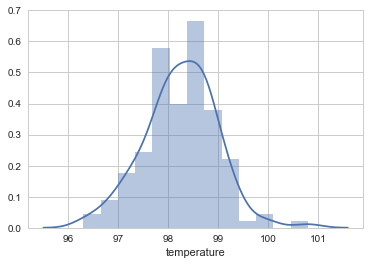

In [49]:
# 1. The distribution is roughly normal according the below visualization, 
#    with the follow qualifications:

# Let's see how much it differs from the norm
print '\nWith .25 p-value, we fail to reject the null hypothesis that the distribution comes from a normal distribution:'
print '\n', sp.stats.normaltest(df['temperature'])
print '\nStandard error of measurement: ', sp.stats.sem(df['temperature'])
print '\nStandard Deviation: ', np.std(df['temperature'])
print '\n', sp.stats.describe(df['temperature'])

sns.distplot(df['temperature']);

In [31]:
# 2. Is the sample size large? Are the observations independent?

print 'The sample size is: ', len(df)
print '\nThe same size is greater than 30, which for CTL means that the sample mean should be a good approximation of the population mean'


The sample size is:  130

The same size is greater than 30, which for CTL means that the sample mean should be a good approximation of the population mean


In [36]:
# 3. Is the true population mean really 98.6 degrees F?

print 'The true population mean is not 98.6.     The statistical mean of the population can be approximated using the data: ', df['temperature'].mean()


The true population mean is not 98.6.     The statistical mean of the population can be approximated using the data:  98.2492307692


In [55]:
# 4. At what temperature should we consider someone's temperature to be "abnormal"?

# For general Bayesian statistics:
sp.stats.bayes_mvs(df['temperature'])

# For confidence intervals 
print 'abnormal body temperatures fall outside the following interval: \n', \
sp.stats.t.interval(0.95, len(df)-1, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

abnormal body temperatures fall outside the following interval: 
(96.804200016139845, 99.69426152232171)


Mean of Male samples  :  98.1046153846
Mean of Female samples:  98.3938461538

Male  :  NormaltestResult(statistic=0.89119996669505019, pvalue=0.64043990745691226)
Female:  NormaltestResult(statistic=4.7354381129084002, pvalue=0.093694193898563982)

Standard error of measurement (Male)  :  0.0866699855229
Standard error of measurement (Female):  0.0922183060804

Male  :  DescribeResult(nobs=65, minmax=(96.299999999999997, 99.5), mean=98.104615384615371, variance=0.48825961538461526, skewness=-0.20841723175963575, kurtosis=-0.43415936141781497)

Female:  DescribeResult(nobs=65, minmax=(96.400000000000006, 100.8), mean=98.393846153846141, variance=0.55277403846153739, skewness=0.09590698007442927, kurtosis=1.4676242642332449)


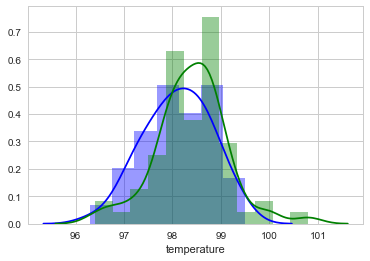

In [79]:
# 5. Is there a significant difference between males and females in normal temperature?

Male = df[df['gender'] == 'M']['temperature']
Female = df[df['gender'] == 'F']['temperature']


print 'Mean of Male samples  : ', df[df['gender'] == 'M']['temperature'].mean()
print 'Mean of Female samples: ', df[df['gender'] == 'F']['temperature'].mean()

print '\nMale  : ', sp.stats.normaltest(Male)
print 'Female: ', sp.stats.normaltest(Female)
print '\nStandard error of measurement (Male)  : ', sp.stats.sem(Male)
print 'Standard error of measurement (Female): ', sp.stats.sem(Female)

print '\nMale  : ', sp.stats.describe(Male)
print '\nFemale: ', sp.stats.describe(Female)
sns.distplot(Male, label='Male', color='blue')
sns.distplot(Female, color='green');

In [61]:
from scipy.stats import ks_2samp
# Kolmogorov-Smirnov Statistic
ks_2samp(Male, Female)

# We CANNOT reject the null hypothesis that the samples are drawen from the same distribution 
# Because the p-value is high and the K-S (Kolmogorov-Smirnov) statistic is high

# Thus there is no significant difference between male and female normal temperature.

Ks_2sampResult(statistic=0.18461538461538457, pvalue=0.19539014047941772)